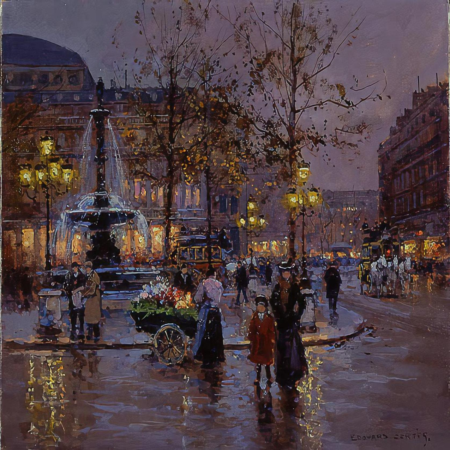

In [4]:
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image
import os
DIR = r'C:\Users\amitr5\PycharmProjects\deep_van_gogh'
os.chdir(DIR)
ROOT = './data'
DATASET_DIR = './data/Post_Impressionism'
CSV_FILE = './data/classes.csv'

import preprocessing



temp = preprocessing.ImageFolderForBinaryClassification(root=ROOT, target='is_van_gogh', transform=transforms.Resize((450, 450)))
pic = temp[0][0]
pic

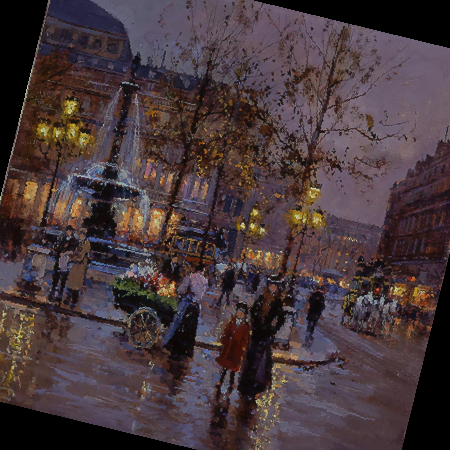

In [6]:
flip_transform = transforms.Compose([
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=30),
    transforms.RandomPerspective(distortion_scale=0.3, p=0.5),
])
flip_transform(pic)

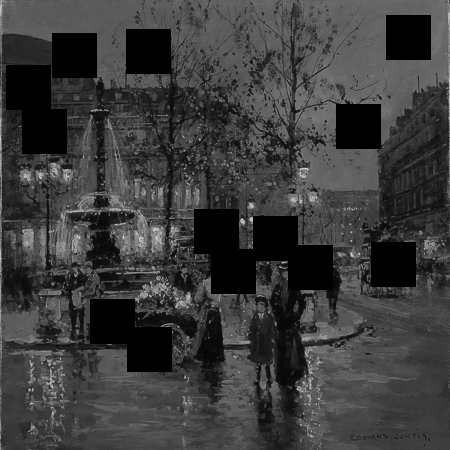

In [162]:
n_times = 25
dropout_transform = transforms.Compose([
    transforms.ToTensor(),
    *([transforms.RandomErasing(p=0.5, scale=(0.01, 0.01), ratio=(1, 1))]*n_times),
    transforms.Grayscale(),
])
to_pil_image(dropout_transform(pic))

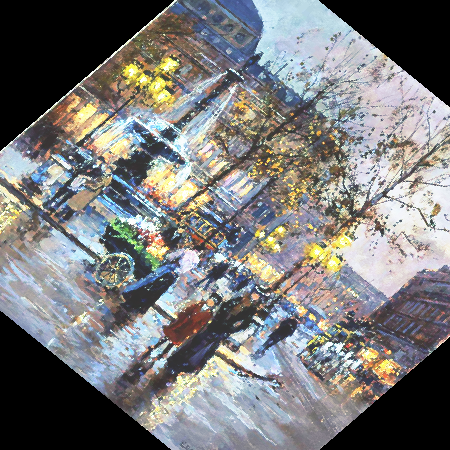

In [322]:
affine_transform = transforms.Compose([
    transforms.RandomAffine(degrees=180, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=(10,10)),
    transforms.RandomEqualize(p=0.5),
])
affine_transform(pic)

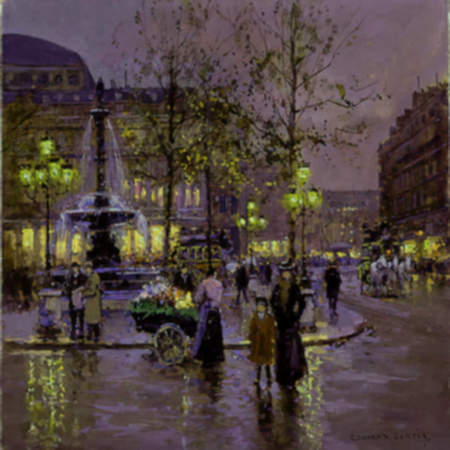

In [324]:
blur_transform = transforms.Compose([
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.GaussianBlur(kernel_size=(3,3), sigma=(0.1, 2))
])
blur_transform(pic)

In [195]:
# transforms.RandAugment(num_ops=2, magnitude=10)(pic)